In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score


In [7]:
# Load the dataset
df = pd.read_csv(r"C:\Users\aadya\Downloads\spambase\spambase.data", header=None)

# Load column names from the spambase.names file
names_file_path = r"C:\Users\aadya\Downloads\spambase\spambase.names"
with open(names_file_path, 'r') as f:
    lines = f.readlines()
    # Extract column names from lines starting with "word"
    column_names = [line.split(":")[0].strip() for line in lines if line.startswith("word")]

# Manually specify additional column names for numerical features
additional_columns = [f"feature_{i}" for i in range(len(column_names), 58)]

# Combine all column names
all_column_names = column_names + additional_columns

# Assign column names to the DataFrame
df.columns = all_column_names
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [8]:
# independent and dependent features
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00     

In [9]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: feature_57, Length: 4601, dtype: int64

In [10]:
# Display summary statistics
print(df.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

In [11]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
word_freq_make          0
word_freq_address       0
word_freq_all           0
word_freq_3d            0
word_freq_our           0
word_freq_over          0
word_freq_remove        0
word_freq_internet      0
word_freq_order         0
word_freq_mail          0
word_freq_receive       0
word_freq_will          0
word_freq_people        0
word_freq_report        0
word_freq_addresses     0
word_freq_free          0
word_freq_business      0
word_freq_email         0
word_freq_you           0
word_freq_credit        0
word_freq_your          0
word_freq_font          0
word_freq_000           0
word_freq_money         0
word_freq_hp            0
word_freq_hpl           0
word_freq_george        0
word_freq_650           0
word_freq_lab           0
word_freq_labs          0
word_freq_telnet        0
word_freq_857           0
word_freq_data          0
word_freq_415           0
word_freq_85            0
word_freq_technology    0
word_freq_1999          0
word_freq_parts       

([<matplotlib.patches.Wedge at 0x228e1aab520>,
 [Text(-0.3594306573832482, 1.0396199317698012, '0'),
  Text(0.3594307547194897, -1.0396198981174698, '1')],
 [Text(-0.1960530858454081, 0.5670654173289824, '60.60'),
  Text(0.19605313893790347, -0.5670653989731653, '39.40')])

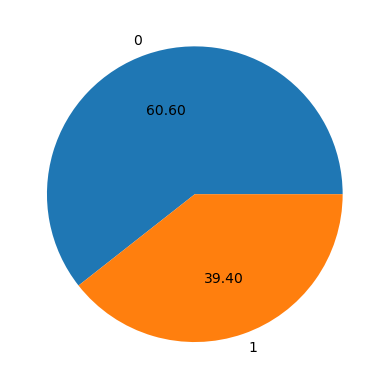

In [12]:
y.value_counts()
import matplotlib.pyplot as plt
plt.pie(y.value_counts(),labels=[0,1],autopct='%.2f')

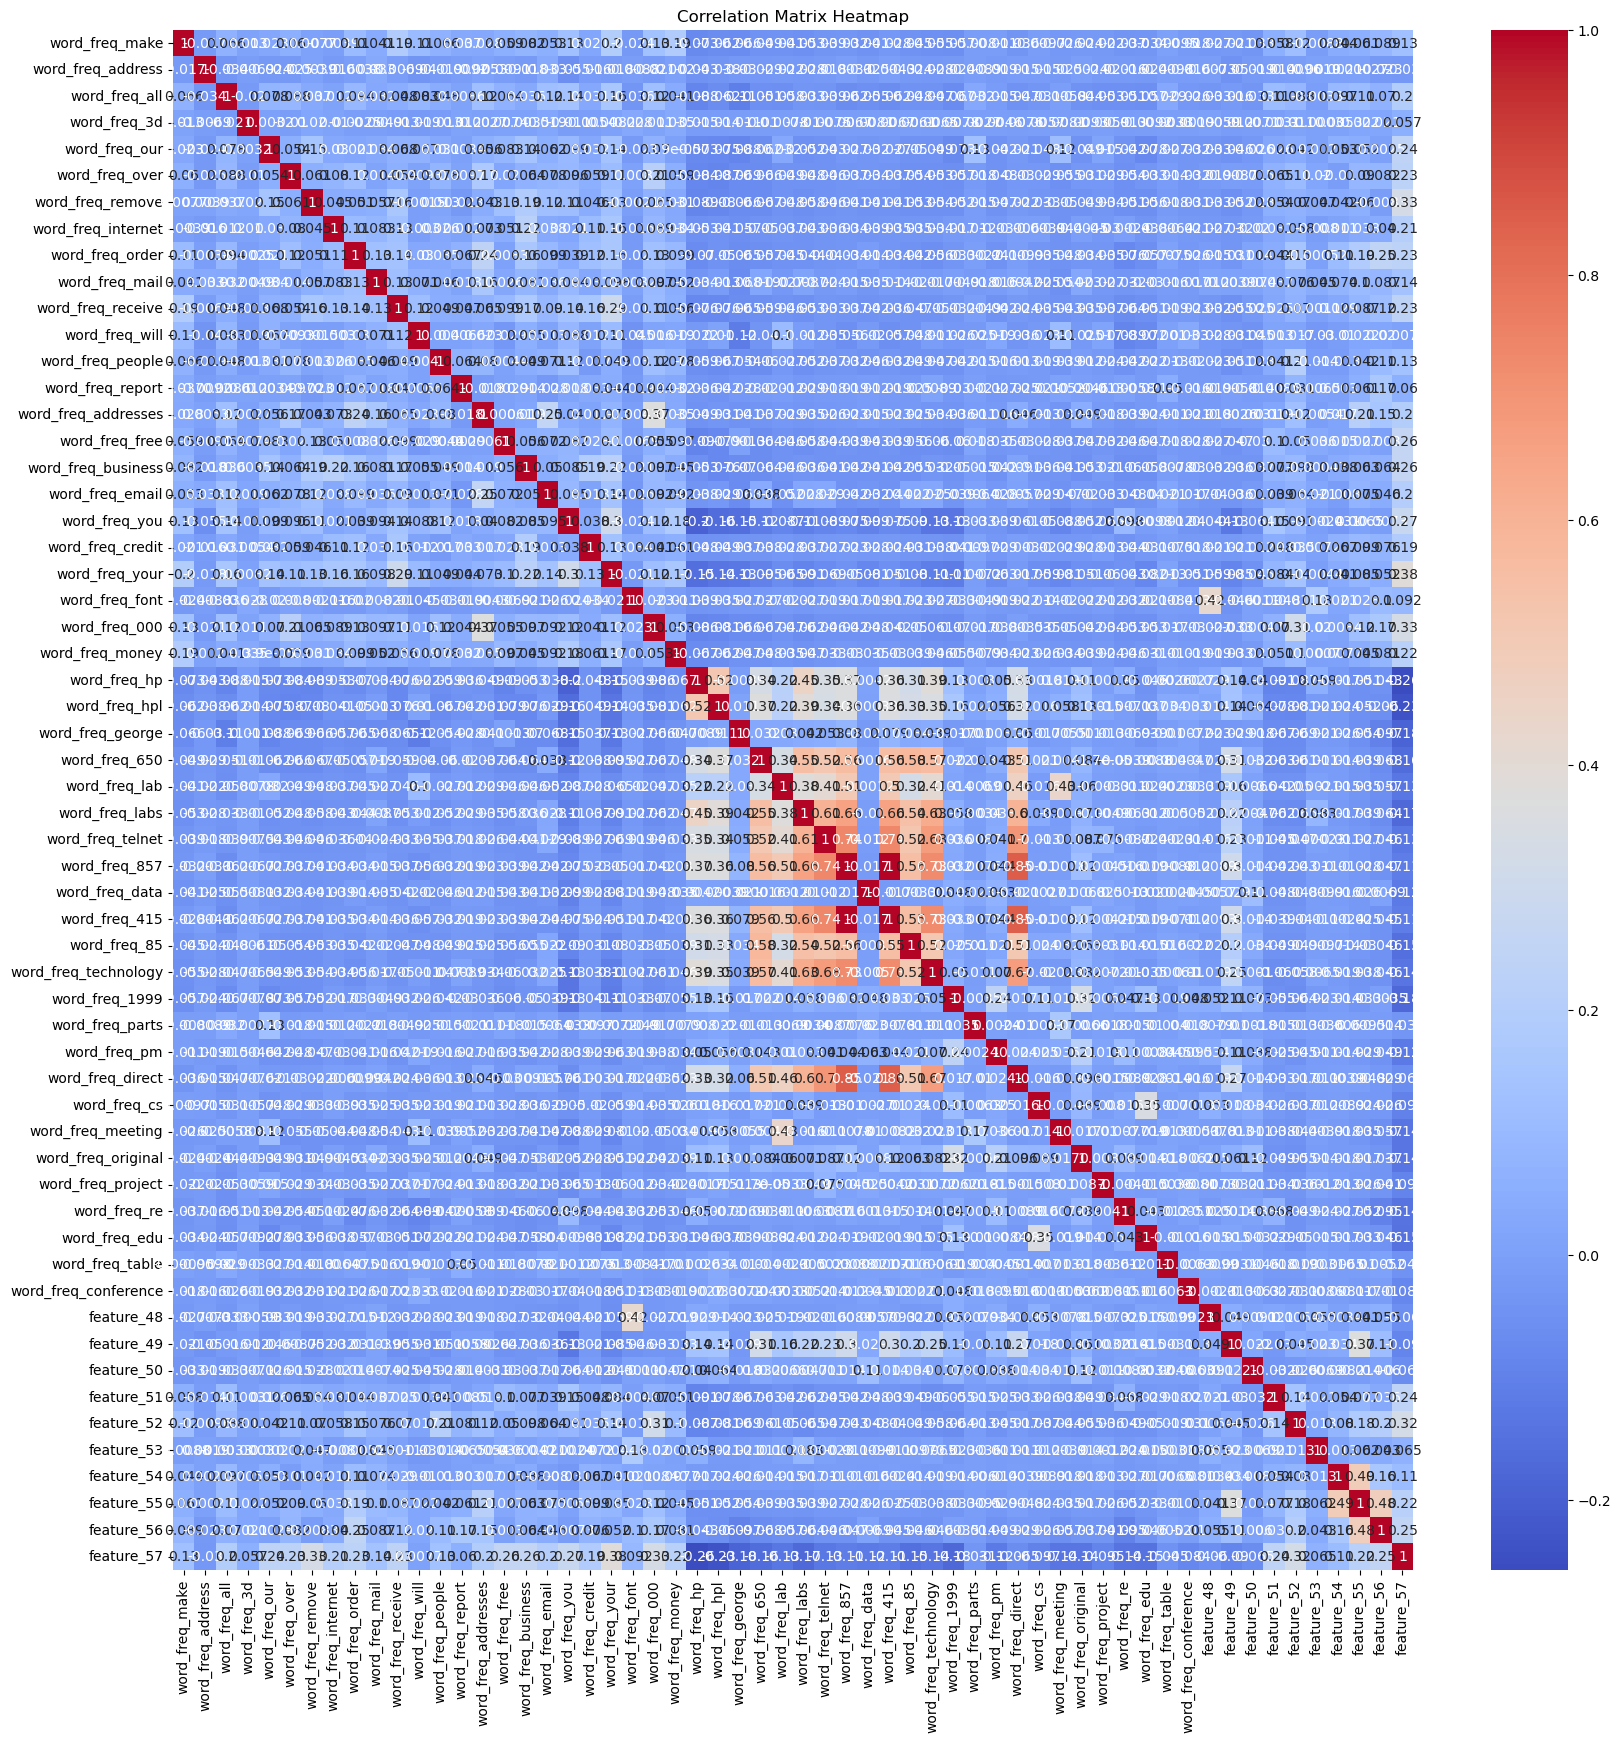

In [13]:
# Correlation matrix heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
# Split data into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train and X_test is:", xtrain.shape, ytrain.shape)
print("Shape of X_test nd y_test is:", xtest.shape, ytest.shape)

Shape of X_train and X_test is: (3680, 57) (3680,)
Shape of X_test nd y_test is: (921, 57) (921,)


In [15]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [16]:
# Initialize classifiers
naive_bayes = GaussianNB()
naive_bayes.fit(xtrain, ytrain)
naive_bayes_pred = naive_bayes.predict(xtest)
naive_bayes_accuracy = accuracy_score(ytest, naive_bayes_pred)
# Print results
print("Naive Bayes Accuracy:", naive_bayes_accuracy)

Naive Bayes Accuracy: 0.8219326818675353


In [17]:
naive_bayes_report = classification_report(ytest, naive_bayes_pred)
print("Naive Bayes Classification Report:")
print(naive_bayes_report)

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       531
           1       0.72      0.94      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921



In [18]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(xtrain, ytrain)
decision_tree_pred = decision_tree.predict(xtest)
decision_tree_accuracy = accuracy_score(ytest, decision_tree_pred)
print("\nDecision Tree Accuracy:", decision_tree_accuracy)


Decision Tree Accuracy: 0.9196525515743756


In [19]:
decision_tree_report = classification_report(ytest, decision_tree_pred)
print("Decision Tree Classification Report:")
print(decision_tree_report)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       531
           1       0.92      0.89      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



In [20]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
knn_pred = knn.predict(xtest)
knn_accuracy = accuracy_score(ytest, knn_pred)
print("\nKNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.8935939196525515


In [21]:
knn_report = classification_report(ytest, knn_pred)
print("KNN Classification Report:")
print(knn_report)

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       531
           1       0.90      0.84      0.87       390

    accuracy                           0.89       921
   macro avg       0.89      0.89      0.89       921
weighted avg       0.89      0.89      0.89       921



In [22]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(xtrain, ytrain)
random_forest_pred = random_forest.predict(xtest)
random_forest_accuracy = accuracy_score(ytest, random_forest_pred)
print("\nRandom Forest Accuracy:", random_forest_accuracy)


Random Forest Accuracy: 0.9554831704668838


In [23]:
random_forest_report = classification_report(ytest, random_forest_pred)
print("Random Forest Classification Report:")
print(random_forest_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921



In [24]:
gb_boost = GradientBoostingClassifier()
gb_boost.fit(xtrain, ytrain)
gb_boost_pred = gb_boost.predict(xtest)
gb_boost_accuracy = accuracy_score(ytest, gb_boost_pred)
print("\nGradient Boost Accuracy:", gb_boost_accuracy)


Gradient Boost Accuracy: 0.9457111834961998


In [25]:
gb_boost_report = classification_report(ytest, gb_boost_pred)
print("Gradient Boost Classification Report:")
print(gb_boost_report)

Gradient Boost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       531
           1       0.96      0.91      0.93       390

    accuracy                           0.95       921
   macro avg       0.95      0.94      0.94       921
weighted avg       0.95      0.95      0.95       921



Naive Bayes Model Evaluation:
Accuracy: 0.8360477741585234
Confusion Matrix:
[[501  30]
 [121 269]]
Precision: 0.8996655518394648, Recall: 0.6897435897435897, F1-score: 0.7808417997097242
AUC: 0.9297720797720798
Random Forest Model Evaluation:
Accuracy: 0.9142236699239956
Confusion Matrix:
[[506  25]
 [ 54 336]]
Precision: 0.9307479224376731, Recall: 0.8615384615384616, F1-score: 0.8948069241011984
AUC: 0.9639987445072191
KNN Model Evaluation:
Accuracy: 0.8838219326818675
Confusion Matrix:
[[502  29]
 [ 78 312]]
Precision: 0.9149560117302052, Recall: 0.8, F1-score: 0.853625170998632
AUC: 0.9398691390216813
Decision Tree Model Evaluation:
Accuracy: 0.9055374592833876
Confusion Matrix:
[[511  20]
 [ 67 323]]
Precision: 0.9416909620991254, Recall: 0.8282051282051283, F1-score: 0.8813096862210097
AUC: 0.9367883528900477
Gradient Boosting Model Evaluation:
Accuracy: 0.9087947882736156
Confusion Matrix:
[[505  26]
 [ 58 332]]
Precision: 0.9273743016759777, Recall: 0.8512820512820513, F1-scor

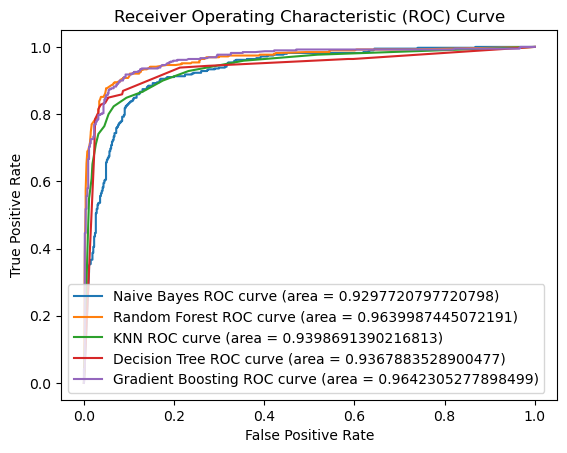

In [26]:
# SelectKBest feature selection
selector = SelectKBest(score_func=f_classif, k=20)  

xtrain_selected = selector.fit_transform(xtrain, ytrain)
xtest_selected = selector.transform(xtest)

# Define classifiers and parameter grids
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

param_grid = {
    "Naive Bayes": {},
    "Random Forest": {'n_estimators': [10,20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [None, 5, 10, 15, 20, 25, 30, 30 , 35, 40, 45, 50 ]},
    "KNN": {'n_neighbors': [3, 5, 10, 15, 20, 25]},
    "Decision Tree": {'max_depth': [None, 5, 10, 15, 20 , 25, 30, 35, 40, 45, 50]},
    "Gradient Boosting": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

# Perform grid search and evaluation for each classifier
for name, classifier in classifiers.items():
    # Perform grid search
    grid_search = GridSearchCV(classifier, param_grid[name], scoring='accuracy', cv=5)
    grid_search.fit(xtrain_selected, ytrain)
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(xtest_selected)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(ytest, y_pred)
    conf_matrix = confusion_matrix(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    y_prob = best_model.predict_proba(xtest_selected)[:, 1]
    auc = roc_auc_score(ytest, y_prob)
    fpr, tpr, _ = roc_curve(ytest, y_prob)

    # Print evaluation results
    print(f"{name} Model Evaluation:")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1}")
    print(f"AUC: {auc}")
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} ROC curve (area = {auc})')

# Display ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Random Forest Model Evaluation:
Accuracy: 0.9044516829533116
Confusion Matrix:
[[492  39]
 [ 49 341]]
Precision: 0.8973684210526316, Recall: 0.8743589743589744, F1-score: 0.8857142857142858
AUC: 0.9609107151480032
Decision Tree Model Evaluation:
Accuracy: 0.8631921824104235
Confusion Matrix:
[[476  55]
 [ 71 319]]
Precision: 0.8529411764705882, Recall: 0.8179487179487179, F1-score: 0.8350785340314136
AUC: 0.8629871070549036


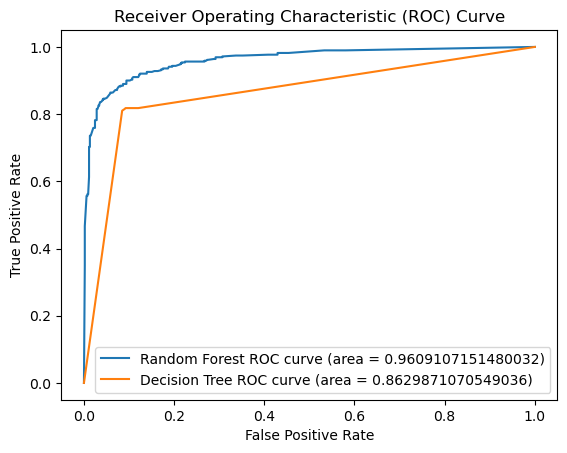

In [30]:
# SelectKBest feature selection
selector = SelectKBest(score_func=f_classif, k=10)  
xtrain_selected = selector.fit_transform(xtrain, ytrain)
xtest_selected = selector.transform(xtest)

class_weights = {0: 1, 1: 10}

# Define classifiers and parameter grids
classifiers = {
    #"Naive Bayes": GaussianNB( class_weight = class_weights ),
    "Random Forest": RandomForestClassifier(random_state = 42, class_weight = class_weights ),
    #"KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state = 42, class_weight = class_weights ),
    #"Gradient Boosting": GradientBoostingClassifier(random_state = 42, class_weight = class_weights )
}

param_grid = {
    "Naive Bayes": {},
    "Random Forest": {'n_estimators': [10,20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [None, 5, 10, 15, 20, 25, 30, 30 , 35, 40, 45, 50 ]},
    "KNN": {'n_neighbors': [3, 5, 10, 15, 20, 25]},
    "Decision Tree": {'max_depth': [None, 5, 10, 15, 20 , 25, 30, 35, 40, 45, 50]},
    "Gradient Boosting": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

# Perform grid search and evaluation for each classifier
for name, classifier in classifiers.items():
    # Perform grid search
    grid_search = GridSearchCV(classifier, param_grid[name], scoring='accuracy', cv=5)
    grid_search.fit(xtrain_selected, ytrain)
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(xtest_selected)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(ytest, y_pred)
    conf_matrix = confusion_matrix(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    y_prob = best_model.predict_proba(xtest_selected)[:, 1]
    auc = roc_auc_score(ytest, y_prob)
    fpr, tpr, _ = roc_curve(ytest, y_prob)

    # Print evaluation results
    print(f"{name} Model Evaluation:")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1}")
    print(f"AUC: {auc}")
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} ROC curve (area = {auc})')

# Display ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [42]:
rf_conf_matrix = confusion_matrix(ytest, y_pred)

In [44]:
#calcualting costs

def calculate_normalized_misclassification_cost(conf_matrix, y_test):
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    TN = conf_matrix[0][0]
    TP = conf_matrix[1][1]
    
    # Costs
    C_FN = 10  # Cost for false negatives
    C_FP = 1   # Cost for false positives
    
    # Actual number of positives and potential FPs (all negatives)
    N_FN_actual = FN + TP
    N_FP_potential = FP + TN
    
    # Misclassification cost
    misclassification_cost = (C_FN * FN) + (C_FP * FP)
    
    # Maximum possible cost
    max_possible_cost = (C_FN * N_FN_actual) + (C_FP * N_FP_potential)
    
    # Normalized cost
    normalized_cost = misclassification_cost / max_possible_cost
    return normalized_cost

In [45]:
rf_normalized_cost = calculate_normalized_misclassification_cost(rf_conf_matrix, ytest)

In [46]:
print(f"Random Forest Normalized Misclassification Cost: {rf_normalized_cost}")

Random Forest Normalized Misclassification Cost: 0.17264725795531483


In [38]:
# Define cost ratio
cost_ratio = 10

# Iterate over each classifier
for name, classifier in classifiers.items():
    # Perform grid search
    grid_search = GridSearchCV(classifier, param_grid[name], scoring='accuracy', cv=5)
    grid_search.fit(xtrain_selected, ytrain)
    best_model = grid_search.best_estimator_
    
    # Make predictions and calculate probabilities
    y_pred = best_model.predict(xtest_selected)
    y_prob = best_model.predict_proba(xtest_selected)[:, 1]
    
    # Adjust probabilities based on cost ratio
    adjusted_y_prob = y_prob * cost_ratio
    
    # Calculate misclassification costs
    false_positive_cost = sum(adjusted_y_prob[ytest == 0])
    false_negative_cost = sum(adjusted_y_prob[ytest == 1])
    total_cost = false_positive_cost + false_negative_cost
    
    # Print misclassification costs for the model
    print(f"{name} Misclassification Costs:")
    print(f"False Positive Cost: {false_positive_cost}")
    print(f"False Negative Cost: {false_negative_cost}")
    print(f"Total Cost: {total_cost}")
    print()


Naive Bayes Misclassification Costs:
False Positive Cost: 311.8855326845418
False Negative Cost: 2674.253019096465
Total Cost: 2986.1385517810068

Random Forest Misclassification Costs:
False Positive Cost: 539.1547172356733
False Negative Cost: 3241.291428571433
Total Cost: 3780.446145807106

KNN Misclassification Costs:
False Positive Cost: 568.0
False Negative Cost: 3132.0
Total Cost: 3700.0

Decision Tree Misclassification Costs:
False Positive Cost: 496.62491620169226
False Negative Cost: 3252.1594138587516
Total Cost: 3748.7843300604436

Gradient Boosting Misclassification Costs:
False Positive Cost: 539.5849059078224
False Negative Cost: 3208.487187185409
Total Cost: 3748.072093093231



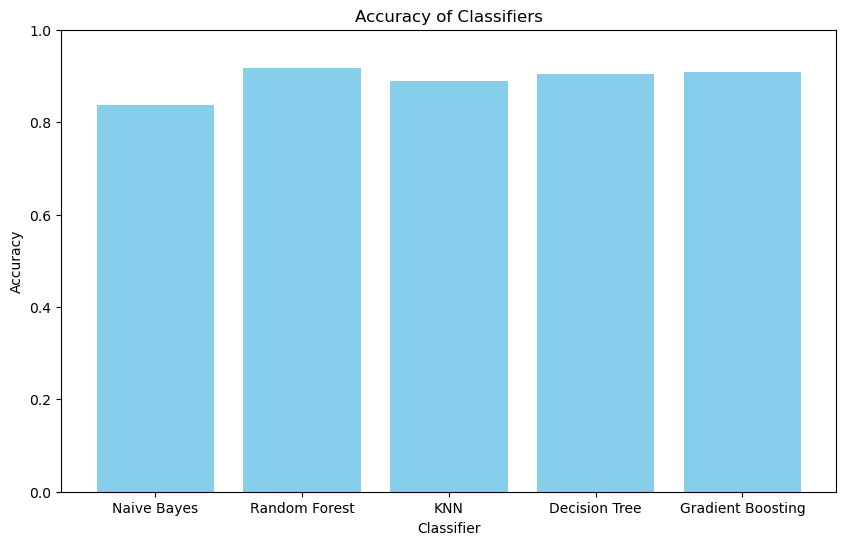

In [39]:
import matplotlib.pyplot as plt

# Initialize lists to store classifier names and accuracies
classifier_names = []
accuracies = []

# Perform grid search and evaluation for each classifier
for name, classifier in classifiers.items():
    # Perform grid search
    grid_search = GridSearchCV(classifier, param_grid[name], scoring='accuracy', cv=5)
    grid_search.fit(xtrain_selected, ytrain)
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(xtest_selected)
    
    # Calculate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    
    # Store classifier name and accuracy
    classifier_names.append(name)
    accuracies.append(accuracy)

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classifiers')
plt.ylim(0, 1)
plt.show()